# Introduction

# Data Preparation

## Importing Libraries

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Cloning the datasets.

!git clone https://github.com/dassus98/AssetDegradation.git

Cloning into 'AssetDegradation'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 25 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (25/25), 11.80 MiB | 3.35 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
# Importing necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, roc_auc_score as roc_auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('dark')

## Importing & Formatting the Data

In [4]:
# Creating indexes.

index_names = ['unit', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [5]:
# Creating base data frames.

df_train = pd.read_csv(r'/content/AssetDegradation/train_FD001.txt', sep='\s+', \
                       header=None, index_col=False, names=col_names)
df_test = pd.read_csv(r'/content/AssetDegradation/test_FD001.txt', sep='\s+', \
                      header=None, index_col=False, names=col_names)
y_test = pd.read_csv(r'/content/AssetDegradation/RUL_FD001.txt', sep='\s+', \
                     header=None, index_col=False, names=['RUL'])

In [6]:
train = df_train.copy()
test = df_test.copy()

In [7]:
print('Shape of training set: {}'.format(train.shape))
print('Shape of test set: {}'.format(test.shape))
print('Shape of final values: {}'.format(y_test.shape))

Shape of training set: (20631, 26)
Shape of test set: (13096, 26)
Shape of final values: (100, 1)


In [8]:
train.head()

,unit,cycle,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [9]:
test.head()

,unit,cycle,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


## Basic Observations

In [10]:
train.isnull().sum()

unit         0
cycle        0
setting_1    0
setting_2    0
setting_3    0
s_1          0
s_2          0
s_3          0
s_4          0
s_5          0
s_6          0
s_7          0
s_8          0
s_9          0
s_10         0
s_11         0
s_12         0
s_13         0
s_14         0
s_15         0
s_16         0
s_17         0
s_18         0
s_19         0
s_20         0
s_21         0
dtype: int64

In [11]:
test.isnull().sum()

unit         0
cycle        0
setting_1    0
setting_2    0
setting_3    0
s_1          0
s_2          0
s_3          0
s_4          0
s_5          0
s_6          0
s_7          0
s_8          0
s_9          0
s_10         0
s_11         0
s_12         0
s_13         0
s_14         0
s_15         0
s_16         0
s_17         0
s_18         0
s_19         0
s_20         0
s_21         0
dtype: int64

<br>

No null values. All good.

In [12]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [13]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit,13096.0,51.543907,2.828942e+01,1.0000,28.0000,52.0000,76.0000,100.0000
cycle,13096.0,76.836515,5.305775e+01,1.0000,33.0000,69.0000,113.0000,303.0000
setting_1,13096.0,-0.000011,2.202685e-03,-0.0082,-0.0015,-0.0000,0.0015,0.0078
setting_2,13096.0,0.000004,2.940306e-04,-0.0006,-0.0002,-0.0000,0.0003,0.0007
setting_3,13096.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s_1,13096.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,13096.0,642.475088,4.008993e-01,641.1300,642.1975,642.4600,642.7400,644.3000
s_3,13096.0,1588.099204,5.003274e+00,1569.0400,1584.6000,1587.9900,1591.3625,1607.5500
s_4,13096.0,1404.735362,6.688309e+00,1384.3900,1399.9500,1404.4400,1409.0500,1433.3600
s_5,13096.0,14.620000,1.776425e-15,14.6200,14.6200,14.6200,14.6200,14.6200


## Adding RUL Column

In [14]:
# The dependent variable we will be trying to predict is the RUL: Remaining Useful Life.
# This metric is crucial to understanding when precisely each jet engine fails.
# Failure of a jet engine mid-flight can have catastrophic results.
# Accurately predicting jet engine failure can assist the management of maintenance schedules which ensure maximal safety.

def add_RUL_column(df):
    train_by_unit = df.groupby(by='unit')
    max_cycles = train_by_unit['cycle'].max()
    merged = df.merge(max_cycles.to_frame(name='max_cycle'), left_on='unit',right_index=True)
    merged['RUL'] = merged['max_cycle'] - merged['cycle']
    merged = merged.drop('max_cycle', axis=1)
    return merged

In [15]:
train = add_RUL_column(train)
test = add_RUL_column(test)

In [16]:
train

,unit,cycle,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


## Adding Risk Column

In [17]:
# Re-interpreting the RUL as a tripartite risk.
# Low-Risk RUL: Higher than 100
# Medium-Risk RUL: Between 100 and 50
# High-Risk RUL: Less than or equal to 50

def add_risk_column(df):
    risk_thresholds = [(df['RUL'] > 100), (df['RUL'] > 50) & (df['RUL'] <= 100), (df['RUL'] <= 50)]
    # Where {0: low, 1: medium, 2: high}
    risk_labels = [0, 1, 2]
    df['risk'] = np.select(risk_thresholds, risk_labels)
    return df

In [18]:
train = add_risk_column(train)
test = add_risk_column(test)

In [19]:
train['risk'] = pd.to_numeric(train['risk'], downcast='float')
test['risk'] = pd.to_numeric(test['risk'], downcast='float')

In [20]:
train.dtypes

unit           int64
cycle          int64
setting_1    float64
setting_2    float64
setting_3    float64
s_1          float64
s_2          float64
s_3          float64
s_4          float64
s_5          float64
s_6          float64
s_7          float64
s_8          float64
s_9          float64
s_10         float64
s_11         float64
s_12         float64
s_13         float64
s_14         float64
s_15         float64
s_16         float64
s_17           int64
s_18           int64
s_19         float64
s_20         float64
s_21         float64
RUL            int64
risk         float32
dtype: object

In [21]:
test.dtypes

unit           int64
cycle          int64
setting_1    float64
setting_2    float64
setting_3    float64
s_1          float64
s_2          float64
s_3          float64
s_4          float64
s_5          float64
s_6          float64
s_7          float64
s_8          float64
s_9          float64
s_10         float64
s_11         float64
s_12         float64
s_13         float64
s_14         float64
s_15         float64
s_16         float64
s_17           int64
s_18           int64
s_19         float64
s_20         float64
s_21         float64
RUL            int64
risk         float32
dtype: object

## Creating Maximum Cycle DataFrame

In [22]:
# Last cycle before engine failure (i.e. RUL = 0).

max_cycles = train[index_names].groupby('unit').max()
max_cycles

,cycle
unit,
1,192
2,287
3,179
4,189
5,269
...,...
96,336
97,202
98,156


# Modelling the Data as a Classification Problem

We've already categorized the data into three risk thresholds:
- High risk: RUL < 50
- Medium risk: 100 < RUL < 50
- Low risk: 100 < RUL

In [23]:
train = shuffle(train, random_state=0)

# Creating a validation set with 25% of the data.
# X_train and X_val will include all 21 of the sensors.
# y_train and y_val is just the RUL

X_train, X_val, y_train, y_val = train_test_split(train.iloc[:, 5:26], train.iloc[:, 27], test_size=0.25, random_state=123)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(15473, 21)
(5158, 21)
(15473,)
(5158,)


In [24]:
# These sensors don't serve any real value in the dataset and will slow down the processing time of any model we build.

redundant_sensors = ['s_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19']
X_train.drop(redundant_sensors, axis=1, inplace=True)
X_val.drop(redundant_sensors, axis=1, inplace=True)

In [25]:
X_train

,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
16281,642.96,1583.83,1414.45,552.62,2388.11,9058.77,47.70,521.43,2388.08,8144.41,8.4640,393,39.02,23.2850
8857,641.74,1588.73,1397.20,554.92,2387.98,9060.93,47.17,522.71,2388.03,8141.73,8.3875,392,38.93,23.4825
8297,642.16,1578.91,1402.70,554.07,2388.05,9056.63,47.30,522.32,2388.05,8136.08,8.3889,392,39.05,23.4122
7198,642.50,1585.21,1402.36,553.37,2388.14,9039.24,47.35,521.46,2388.13,8124.51,8.4276,393,38.97,23.2470
17191,642.82,1592.13,1402.50,553.25,2388.13,9048.20,47.47,521.81,2388.10,8130.59,8.4160,393,38.77,23.3966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7088,642.84,1593.29,1412.57,552.86,2388.11,9059.33,47.61,520.50,2388.14,8139.40,8.4399,393,38.84,23.2692
2035,642.23,1589.03,1401.57,553.27,2388.10,9064.84,47.39,521.70,2388.05,8145.59,8.4063,393,39.04,23.4073
10226,642.36,1591.98,1410.27,553.48,2388.10,9059.28,47.51,521.48,2388.13,8133.36,8.4292,391,38.93,23.2901
6791,643.21,1596.12,1418.70,552.58,2388.15,9133.19,47.72,520.70,2388.12,8195.12,8.4777,395,38.42,23.1092


In [26]:
y_train

16281    1.0
8857     0.0
8297     0.0
7198     0.0
17191    0.0
        ... 
7088     1.0
2035     1.0
10226    0.0
6791     2.0
11326    1.0
Name: risk, Length: 15473, dtype: float32

In [27]:
X_val

,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
4715,643.44,1602.40,1425.55,551.72,2388.23,9059.81,47.88,520.22,2388.23,8132.35,8.5021,395,38.63,23.1031
11419,642.00,1590.00,1409.81,553.76,2387.99,9066.79,47.31,522.51,2388.05,8147.84,8.4077,392,39.13,23.4317
2518,642.82,1600.64,1421.68,552.03,2388.18,9050.46,47.86,520.62,2388.18,8122.01,8.4773,396,38.49,23.1289
5297,643.15,1603.07,1429.06,552.16,2388.12,9131.88,47.87,519.80,2388.13,8198.83,8.4834,395,38.44,23.1403
16918,642.50,1599.67,1410.24,553.46,2388.07,9047.79,47.55,520.83,2388.10,8125.14,8.4427,393,38.75,23.3265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,642.45,1589.82,1410.07,553.20,2388.15,9057.82,47.59,520.92,2388.13,8135.88,8.4425,392,38.84,23.1274
17760,642.86,1593.18,1417.63,552.85,2388.16,9060.59,47.86,521.26,2388.17,8133.80,8.4802,394,38.84,23.1971
12918,642.81,1595.37,1410.63,553.74,2388.15,9059.79,47.69,520.88,2388.08,8137.77,8.4827,394,38.91,23.2101
14598,642.86,1596.82,1415.77,552.71,2388.11,9043.34,47.42,521.83,2388.16,8122.59,8.4433,395,38.86,23.2784


In [28]:
y_val

4715     2.0
11419    0.0
2518     2.0
5297     2.0
16918    0.0
        ... 
6298     0.0
17760    2.0
12918    0.0
14598    0.0
5440     2.0
Name: risk, Length: 5158, dtype: float32

# Utility Functions

In [29]:
def class_acc(classifier, X_train, y_train, X_val, y_val):
  print('Training Score: {:.3f}'.format(classifier.score(X_train, y_train)))
  print('Validation Score: {:.3f}'.format(classifier.score(X_val, y_val)))
  print('Validation ROC-AUC Score: {:.3f}'.format(roc_auc(y_val, classifier.predict_proba(X_val), multi_class='ovr')))
  print('---')
  print('Training R2: {:.3f}'.format(r2(y_train, classifier.predict(X_train))))
  print('Validation R2: {:.3f}'.format(r2(y_val, classifier.predict(X_val))))
  print('---')
  print('Training RMSE: {:.3f}'.format(mse(y_train, classifier.predict(X_train))**0.5))
  print('Validation RMSE: {:.3f}'.format(mse(y_val, classifier.predict(X_val))**0.5))

In [30]:
def class_acc_improvement(old_classifier, new_classifier, X_train, y_train, X_val, y_val):
  print('Training Score Change: {:.3f}'.format(new_classifier.score(X_train, y_train) - old_classifier.score(X_train, y_train)))
  print('Validation Score Change: {:.3f}'.format(new_classifier.score(X_val, y_val) - old_classifier.score(X_val, y_val)))
  print('Validation ROC-AUC Score Change: {:.3f}'.format(roc_auc(y_val, new_classifier.predict_proba(X_val), multi_class='ovr') - roc_auc(y_val, old_classifier.predict_proba(X_val), multi_class='ovr' )))
  print('---')
  print('Training R2 Change: {:.3f}'.format(r2(y_train, new_classifier.predict(X_train)) - r2(y_train, old_classifier.predict(X_train))))
  print('Validation R2 Change: {:.3f}'.format(r2(y_val, new_classifier.predict(X_val)) - r2(y_val, old_classifier.predict(X_val))))
  print('---')
  print('Training RMSE Change: {:.3f}'.format(mse(y_train, new_classifier.predict(X_train))**0.5 - mse(y_train, old_classifier.predict(X_train))**0.5))
  print('Validation RMSE Change: {:.3f}'.format(mse(y_val, new_classifier.predict(X_val))**0.5 - mse(y_val, old_classifier.predict(X_val))**0.5))

In [31]:
def acc_graphs(title, value, value_name, training_r2, val_r2, training_rmse, val_rmse, val_roc_auc, xmin, xmax, step):
  fig, axes = plt.subplots(1, 3, figsize=(14,4.25))

  plt.subplot(1,3,1)
  plt.title("R2")
  plt.plot(value, training_r2, label="Training R2")
  plt.plot(value, val_r2, label="Validation R2")
  plt.xlabel(value_name)
  plt.xticks(np.arange(xmin, xmax + 0.01 * xmax, step))
  plt.legend()

  plt.subplot(1,3,2)
  plt.title("RMSE")
  plt.plot(value, training_rmse, label="Training RMSE")
  plt.plot(value, val_rmse, label="Validation RMSE")
  plt.xlabel(value_name)
  plt.xticks(np.arange(xmin, xmax + 0.01 * xmax, step))
  plt.legend()

  plt.subplot(1,3,3)
  plt.title("ROC-AUC")
  plt.plot(value, val_roc_auc, label="Validation ROC-AUC")
  plt.xlabel(value_name)
  plt.xticks(np.arange(xmin, xmax + 0.01 * xmax, step))
  plt.legend()

  plt.suptitle(title)
  plt.tight_layout()

## Decision Tree Classifier

### Base Model

In [32]:
%%time
base_tree = DecisionTreeClassifier(random_state=123)
base_tree.fit(X_train, y_train)

print('Base Decision Tree Classifier:')
class_acc(base_tree, X_train, y_train, X_val, y_val)

Base Decision Tree Classifier:
Training Score: 1.000
Validation Score: 0.701
Validation ROC-AUC Score: 0.757
---
Training R2: 1.000
Validation R2: 0.484
---
Training RMSE: 0.000
Validation RMSE: 0.598
CPU times: user 401 ms, sys: 6.62 ms, total: 408 ms
Wall time: 926 ms


In [33]:
base_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

### Hyperparameter Exploration & Visualization

In [34]:
%%time

training_r2 = []
val_r2 = []
training_rmse = []
val_rmse = []
val_roc_auc = []
depth = range(1, 28)

for d in depth:
    # Building the model.
    tree = DecisionTreeClassifier(max_depth=d, random_state=1)
    tree.fit(X_train, y_train)

    # Predicting the output.
    train_pred = tree.predict(X_train)
    val_pred = tree.predict(X_val)

    # Recording accuracy.
    training_r2.append(r2(y_train, train_pred))
    val_r2.append(r2(y_val, val_pred))
    training_rmse.append(mse(y_train, train_pred)**0.5)
    val_rmse.append(mse(y_val, val_pred)**0.5)
    val_roc_auc.append(roc_auc(y_val, tree.predict_proba(X_val), multi_class='ovr'))

CPU times: user 7.16 s, sys: 72.3 ms, total: 7.23 s
Wall time: 14.1 s


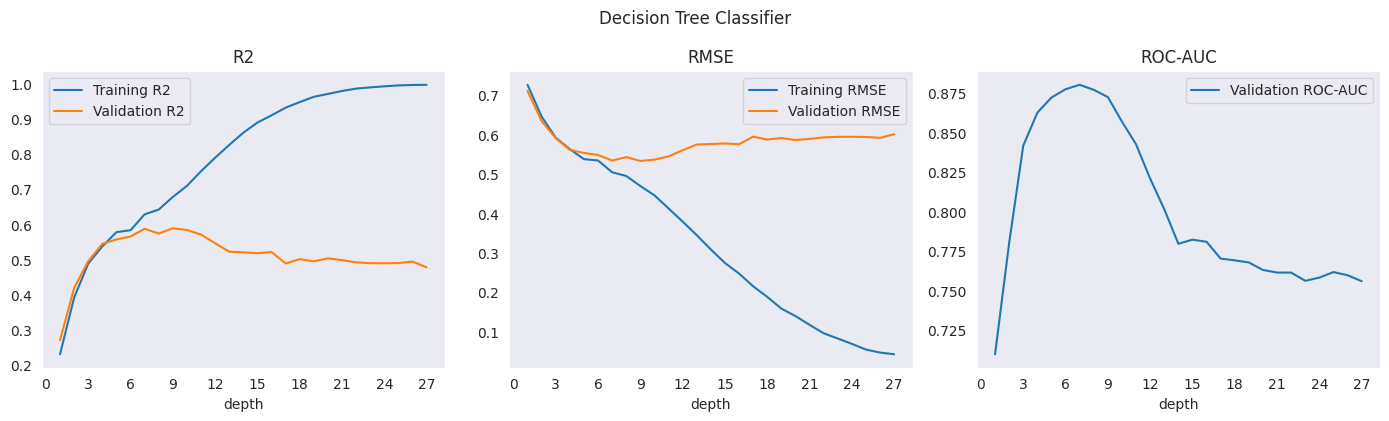

In [35]:
acc_graphs('Decision Tree Classifier', depth, 'depth', training_r2, val_r2, training_rmse, val_rmse, val_roc_auc, 0, 28, 3)

In [36]:
%%time

training_r2 = []
val_r2 = []
training_mse = []
val_mse = []
val_roc_auc = []
features = range(1, 22)

for f in features:
    # Building the model.
    tree = DecisionTreeClassifier(max_features=f, random_state=1)
    tree.fit(X_train, y_train)

    # Predicting the output.
    train_pred = tree.predict(X_train)
    val_pred = tree.predict(X_val)

    # Recording accuracy.
    training_r2.append(r2(y_train, train_pred))
    val_r2.append(r2(y_val, val_pred))
    training_mse.append(mse(y_train, train_pred)**0.5)
    val_mse.append(mse(y_val, val_pred)**0.5)
    val_roc_auc.append(roc_auc(y_val, tree.predict_proba(X_val), multi_class='ovr'))

CPU times: user 5.5 s, sys: 54.2 ms, total: 5.55 s
Wall time: 11.6 s


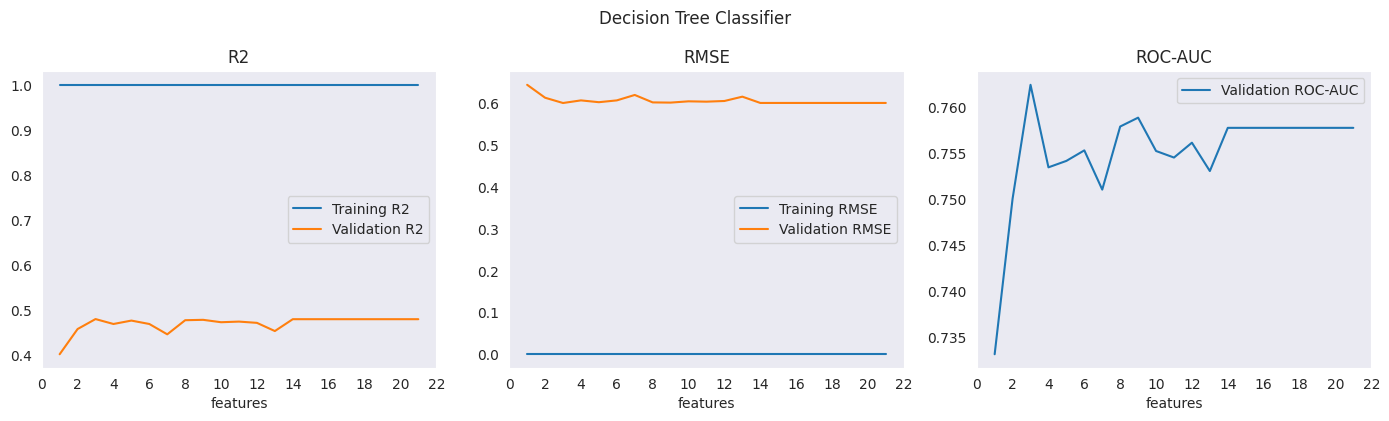

In [37]:
acc_graphs('Decision Tree Classifier', features, 'features', training_r2, val_r2, training_mse, val_mse, val_roc_auc, 0, 22, 2)

In [38]:
%%time

training_r2 = []
val_r2 = []
training_mse = []
val_mse = []
val_roc_auc = []
samples = range(2, 100)

for s in samples:
    # Building the model.
    tree = DecisionTreeClassifier(splitter='best', min_samples_split=s, random_state=1)
    tree.fit(X_train, y_train)

    # Predicting the output.
    train_pred = tree.predict(X_train)
    val_pred = tree.predict(X_val)

    # Recording accuracy.
    training_r2.append(r2(y_train, train_pred))
    val_r2.append(r2(y_val, val_pred))
    training_mse.append(mse(y_train, train_pred)**0.5)
    val_mse.append(mse(y_val, val_pred)**0.5)
    val_roc_auc.append(roc_auc(y_val, tree.predict_proba(X_val), multi_class='ovr'))

CPU times: user 25.3 s, sys: 165 ms, total: 25.5 s
Wall time: 29.5 s


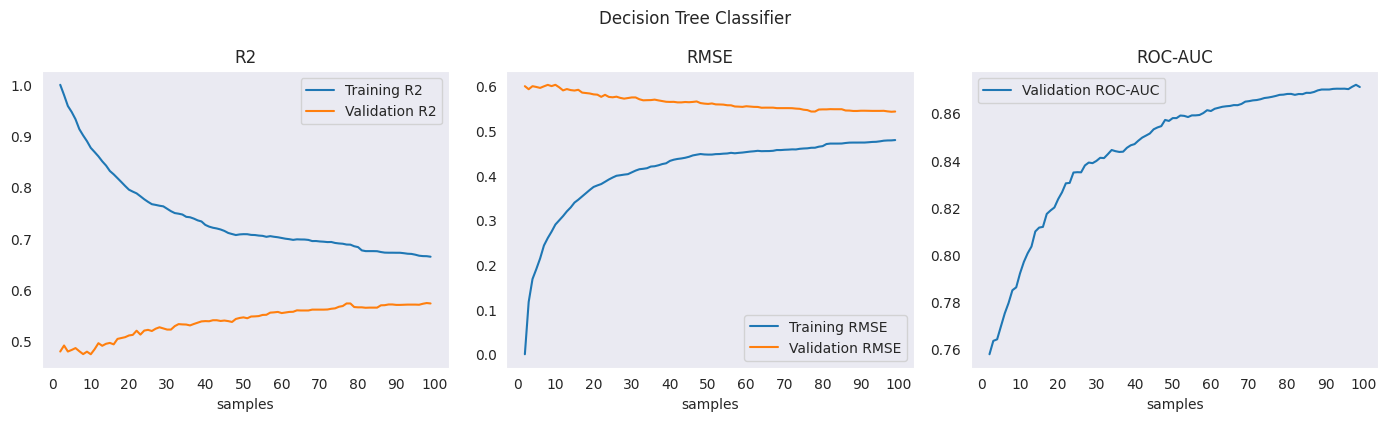

In [39]:
acc_graphs('Decision Tree Classifier', samples, 'samples', training_r2, val_r2, training_mse, val_mse, val_roc_auc, 0, 100, 10)

In [40]:
%%time

training_r2 = []
val_r2 = []
training_mse = []
val_mse = []
val_roc_auc = []
leaves = range(2, 100)

for leaf in leaves:
    # Building the model.
    tree = DecisionTreeClassifier(splitter='best', min_samples_leaf=leaf, random_state=1)
    tree.fit(X_train, y_train)

    # Predicting the output.
    train_pred = tree.predict(X_train)
    val_pred = tree.predict(X_val)

    # Recording accuracy.
    training_r2.append(r2(y_train, train_pred))
    val_r2.append(r2(y_val, val_pred))
    training_mse.append(mse(y_train, train_pred)**0.5)
    val_mse.append(mse(y_val, val_pred)**0.5)
    val_roc_auc.append(roc_auc(y_val, tree.predict_proba(X_val), multi_class='ovr'))

CPU times: user 17.8 s, sys: 29.5 ms, total: 17.8 s
Wall time: 18 s


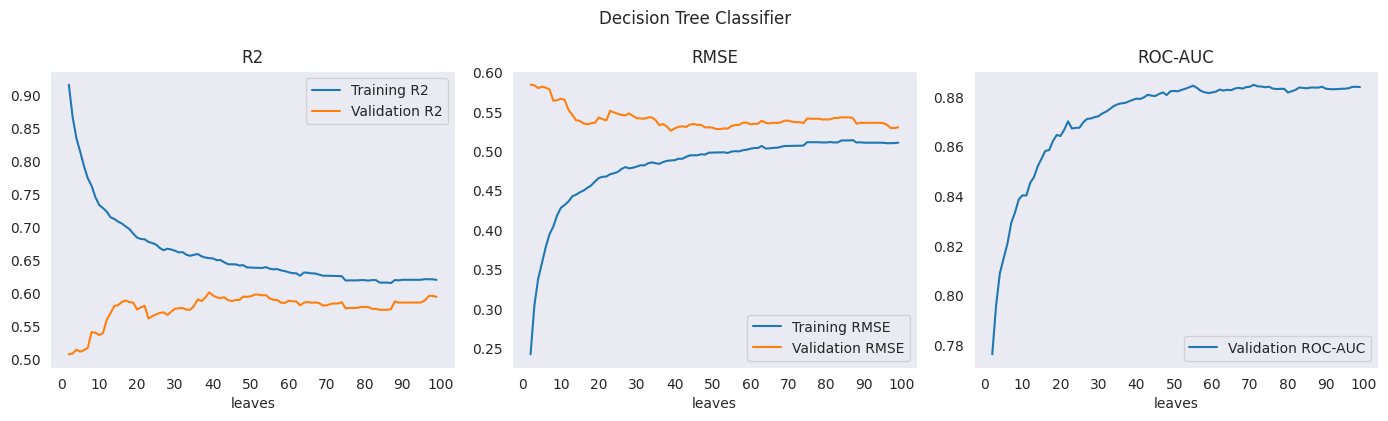

In [41]:
acc_graphs('Decision Tree Classifier', leaves, 'leaves', training_r2, val_r2, training_mse, val_mse, val_roc_auc, 0, 100, 10)

### Randomized Search

In [42]:
splitter = ['best', 'random']
max_depth = list(range(3,13))
max_features = range(1, 22)
min_samples_split = list(range(50, 101, 10))
min_samples_leaf = list(range(50, 101, 10))

tree_params = {
    'splitter': splitter,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    }

print(tree_params)

{'splitter': ['best', 'random'], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'max_features': range(1, 22), 'min_samples_split': [50, 60, 70, 80, 90, 100], 'min_samples_leaf': [50, 60, 70, 80, 90, 100]}


In [44]:
tree = DecisionTreeClassifier(random_state=123)
randomized_search_tree = RandomizedSearchCV(tree, tree_params, n_iter = 250, cv = 5, verbose=2, n_jobs = -1)

In [45]:
%%time

randomized_search_tree.fit(X_train, y_train)

print(randomized_search_tree.best_params_)
print(randomized_search_tree.best_score_)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
{'splitter': 'best', 'min_samples_split': 70, 'min_samples_leaf': 70, 'max_features': 13, 'max_depth': 7}
0.7624891577110526
CPU times: user 1.91 s, sys: 250 ms, total: 2.16 s
Wall time: 49.3 s


In [46]:
print(randomized_search_tree.best_params_)
print(randomized_search_tree.best_score_)

{'splitter': 'best', 'min_samples_split': 70, 'min_samples_leaf': 70, 'max_features': 13, 'max_depth': 7}
0.7624891577110526


### Grid Search

In [59]:
splitter = ['best']
max_depth = [5, 6, 7, 8, 9]
max_features = [11, 12, 13, 14, 15]
min_samples_split = [65, 70, 75]
min_samples_leaf = [65, 70, 75]

tree_params_grid = {
    'splitter': splitter,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    }

print(tree_params_grid)

{'splitter': ['best'], 'max_depth': [5, 6, 7, 8, 9], 'max_features': [11, 12, 13, 14, 15], 'min_samples_split': [65, 70, 75], 'min_samples_leaf': [65, 70, 75]}


In [60]:
tree = DecisionTreeClassifier(random_state=123)
grid_search_tree = GridSearchCV(tree, tree_params_grid, cv = 5, verbose=2, n_jobs = -1)

In [61]:
%%time

grid_search_tree.fit(X_train, y_train)

print(grid_search_tree.best_params_)
print(grid_search_tree.best_score_)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
{'max_depth': 7, 'max_features': 13, 'min_samples_leaf': 70, 'min_samples_split': 65, 'splitter': 'best'}
0.7624891577110526
CPU times: user 2.63 s, sys: 268 ms, total: 2.89 s
Wall time: 1min 22s


In [62]:
print(grid_search_tree.best_params_)
print(grid_search_tree.best_score_)

{'max_depth': 7, 'max_features': 13, 'min_samples_leaf': 70, 'min_samples_split': 65, 'splitter': 'best'}
0.7624891577110526


### Final Model

In [63]:
best_tree = DecisionTreeClassifier(splitter='best', max_depth=7, max_features=13, \
                                   min_samples_split=65, min_samples_leaf=70, random_state=123)
best_tree.fit(X_train, y_train)
print(best_tree)

DecisionTreeClassifier(max_depth=7, max_features=13, min_samples_leaf=70,
                       min_samples_split=65, random_state=123)


In [64]:
print(classification_report(y_val, best_tree.predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      2639
         1.0       0.54      0.41      0.47      1229
         2.0       0.86      0.82      0.84      1290

    accuracy                           0.76      5158
   macro avg       0.73      0.71      0.72      5158
weighted avg       0.75      0.76      0.75      5158



In [65]:
print('Best Decision Tree Classifier Results:')
class_acc(best_tree, X_train, y_train, X_val, y_val)

Best Decision Tree Classifier Results:
Training Score: 0.780
Validation Score: 0.763
Validation ROC-AUC Score: 0.883
---
Training R2: 0.627
Validation R2: 0.595
---
Training RMSE: 0.506
Validation RMSE: 0.530


In [66]:
print('Decition Tree Tuning Improvement:')
class_acc_improvement(base_tree, best_tree, X_train, y_train, X_val, y_val)

Decition Tree Tuning Improvement:
Training Score Change: -0.220
Validation Score Change: 0.062
Validation ROC-AUC Score Change: 0.127
---
Training R2 Change: -0.373
Validation R2 Change: 0.112
---
Training RMSE Change: 0.506
Validation RMSE Change: -0.069


## Random Forest Classifier

### Base Model

In [68]:
%%time

base_forest = RandomForestClassifier(random_state=1)
base_forest.fit(X_train, y_train)

print('Base Random Forest Classifier:')
class_acc(base_forest, X_train, y_train, X_val, y_val)

Base Random Forest Classifier:
Training Score: 1.000
Validation Score: 0.792
Validation ROC-AUC Score: 0.904
---
Training R2: 1.000
Validation R2: 0.654
---
Training RMSE: 0.000
Validation RMSE: 0.490
CPU times: user 7.07 s, sys: 36.6 ms, total: 7.11 s
Wall time: 9.64 s


In [69]:
base_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

### Hyperparameter Exploration & Visualization

In [70]:
%%time

training_r2 = []
val_r2 = []
training_mse = []
val_mse = []
val_roc_auc = []
estimators = [5, 10, 25, 50, 75, 100, 150, 175, 200, 225, 250]

for e in estimators:
    # Building the model.
    forest = RandomForestClassifier(n_estimators=e, random_state=1)
    forest.fit(X_train, y_train)

    # Predicting the output.
    train_pred = forest.predict(X_train)
    val_pred = forest.predict(X_val)

    # Recording accuracy.
    training_r2.append(r2(y_train, train_pred))
    val_r2.append(r2(y_val, val_pred))
    training_mse.append(mse(y_train, train_pred)**0.5)
    val_mse.append(mse(y_val, val_pred)**0.5)
    val_roc_auc.append(roc_auc(y_val, forest.predict_proba(X_val), multi_class='ovr'))

CPU times: user 1min, sys: 211 ms, total: 1min
Wall time: 1min


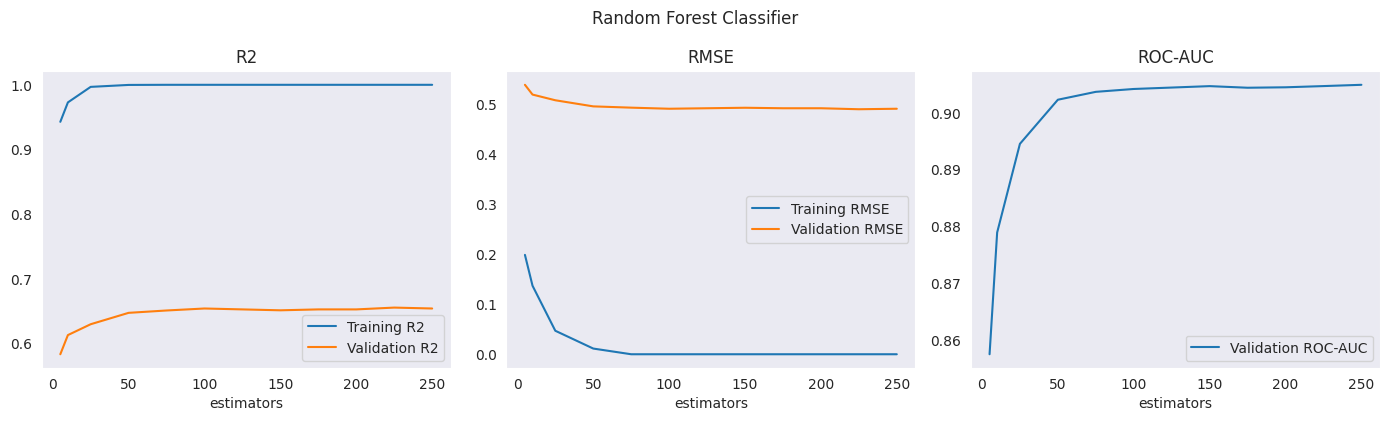

In [71]:
acc_graphs('Random Forest Classifier', estimators, 'estimators', training_r2, val_r2, training_mse, val_mse, val_roc_auc, 0, 250, 50)

In [72]:
%%time

training_r2 = []
val_r2 = []
training_mse = []
val_mse = []
val_roc_auc = []
depth = list(range(1, 31))

for d in depth:
    # Building the model.
    forest = RandomForestClassifier(max_depth=d, random_state=1)
    forest.fit(X_train, y_train)

    # Predicting the output.
    train_pred = forest.predict(X_train)
    val_pred = forest.predict(X_val)

    # Recording accuracy.
    training_r2.append(r2(y_train, train_pred))
    val_r2.append(r2(y_val, val_pred))
    training_mse.append(mse(y_train, train_pred)**0.5)
    val_mse.append(mse(y_val, val_pred)**0.5)
    val_roc_auc.append(roc_auc(y_val, forest.predict_proba(X_val), multi_class='ovr'))

CPU times: user 1min 50s, sys: 159 ms, total: 1min 50s
Wall time: 1min 51s


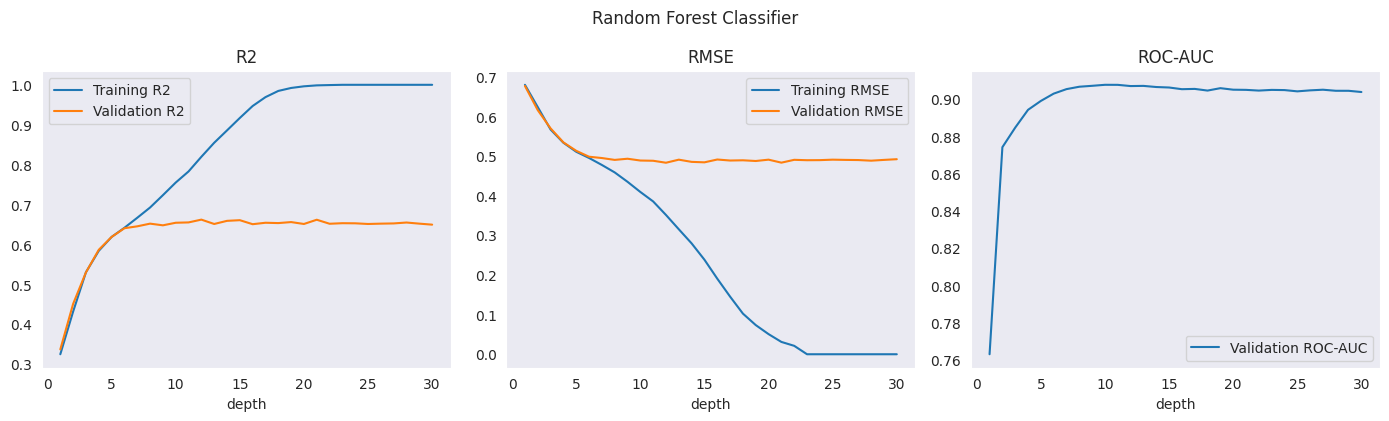

In [73]:
acc_graphs('Random Forest Classifier', depth, 'depth', training_r2, val_r2, training_mse, val_mse, val_roc_auc, 0, 30, 5)

In [74]:
%%time

training_r2 = []
val_r2 = []
training_mse = []
val_mse = []
val_roc_auc = []
features = list(range(1, 22))

for f in features:
    # Building the model.
    forest = RandomForestClassifier(max_features=f, random_state=1)
    forest.fit(X_train, y_train)

    # Predicting the output.
    train_pred = forest.predict(X_train)
    val_pred = forest.predict(X_val)

    # Recording accuracy.
    training_r2.append(r2(y_train, train_pred))
    val_r2.append(r2(y_val, val_pred))
    training_mse.append(mse(y_train, train_pred)**0.5)
    val_mse.append(mse(y_val, val_pred)**0.5)
    val_roc_auc.append(roc_auc(y_val, forest.predict_proba(X_val), multi_class='ovr'))

CPU times: user 4min 21s, sys: 260 ms, total: 4min 21s
Wall time: 4min 22s


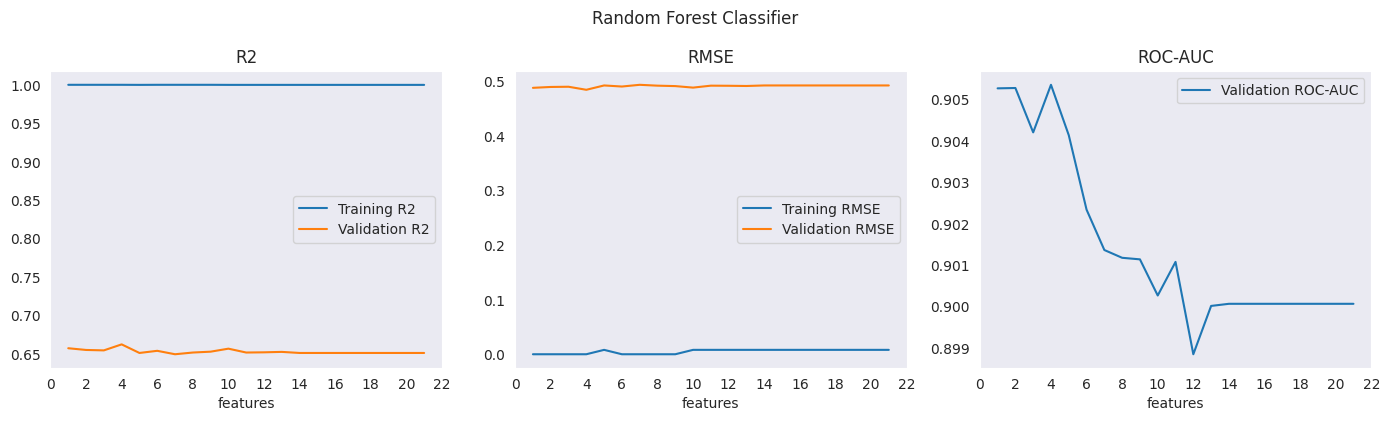

In [75]:
acc_graphs('Random Forest Classifier', features, 'features', training_r2, val_r2, training_mse, val_mse, val_roc_auc, 0, 22, 2)

In [76]:
%%time

training_r2 = []
val_r2 = []
training_mse = []
val_mse = []
val_roc_auc = []
samples = list(range(2,31))

for s in samples:
    # Building the model.
    forest = RandomForestClassifier(min_samples_split=s, random_state=1)
    forest.fit(X_train, y_train)

    # Predicting the output.
    train_pred = forest.predict(X_train)
    val_pred = forest.predict(X_val)

    # Recording accuracy.
    training_r2.append(r2(y_train, train_pred))
    val_r2.append(r2(y_val, val_pred))
    training_mse.append(mse(y_train, train_pred)**0.5)
    val_mse.append(mse(y_val, val_pred)**0.5)
    val_roc_auc.append(roc_auc(y_val, forest.predict_proba(X_val), multi_class='ovr'))

CPU times: user 2min 4s, sys: 168 ms, total: 2min 5s
Wall time: 2min 5s


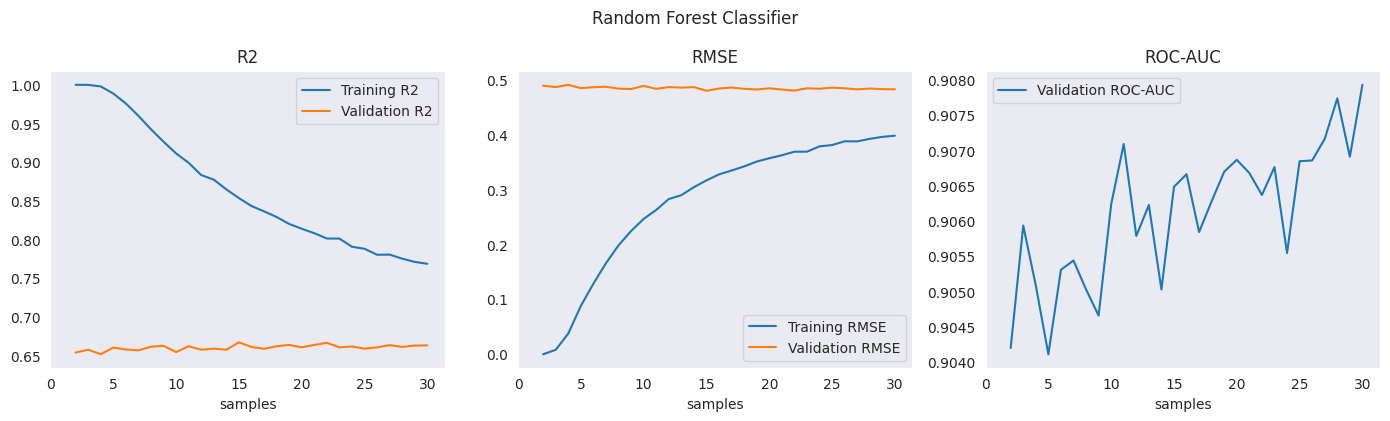

In [77]:
acc_graphs('Random Forest Classifier', samples, 'samples', training_r2, val_r2, training_mse, val_mse, val_roc_auc, 0, 30, 5)

In [78]:
%%time

training_r2 = []
val_r2 = []
training_mse = []
val_mse = []
val_roc_auc = []
leaves = list(range(2,31))

for leaf in leaves:
    # Building the model.
    forest = RandomForestClassifier(min_samples_leaf=leaf, random_state=1)
    forest.fit(X_train, y_train)

    # Predicting the output.
    train_pred = forest.predict(X_train)
    val_pred = forest.predict(X_val)

    # Recording accuracy.
    training_r2.append(r2(y_train, train_pred))
    val_r2.append(r2(y_val, val_pred))
    training_mse.append(mse(y_train, train_pred)**0.5)
    val_mse.append(mse(y_val, val_pred)**0.5)
    val_roc_auc.append(roc_auc(y_val, forest.predict_proba(X_val), multi_class='ovr'))

CPU times: user 1min 41s, sys: 122 ms, total: 1min 41s
Wall time: 1min 41s


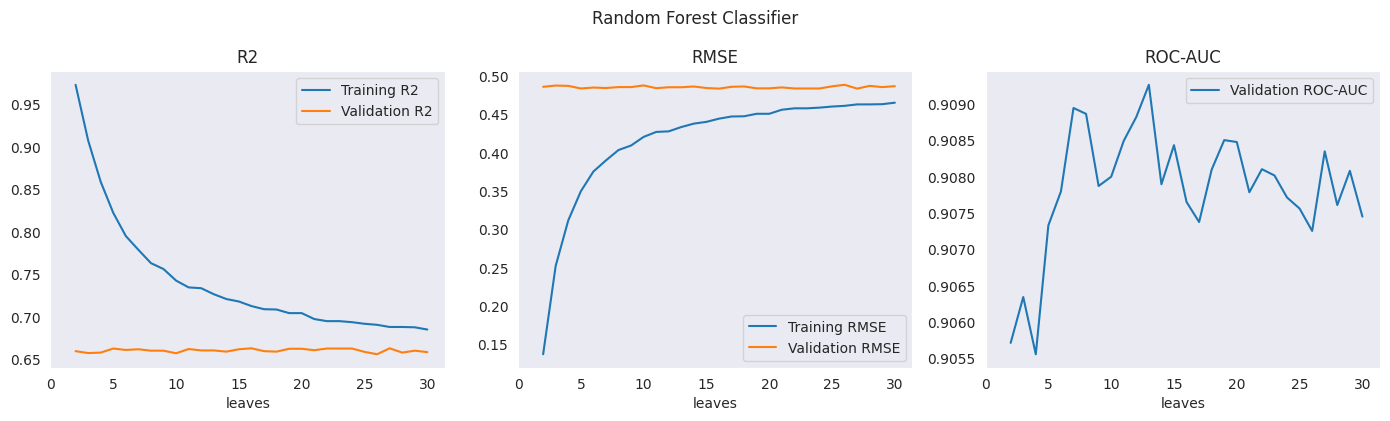

In [79]:
acc_graphs('Random Forest Classifier', leaves, 'leaves', training_r2, val_r2, training_mse, val_mse, val_roc_auc, 0, 30, 5)

### Randomized Search

In [81]:
n_estimators = [50, 75, 100, 150]
max_depth = list(range(4, 11))
max_features = list(range(2, 7))
min_samples_split = list(range(20, 31))
min_samples_leaf = list(range(10, 26))
bootstrap = [True, False]

forest_params = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(forest_params)

{'n_estimators': [50, 75, 100, 150], 'max_depth': [4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6], 'min_samples_split': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'min_samples_leaf': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'bootstrap': [True, False]}


In [82]:
%%time

randomized_forest = RandomForestClassifier(random_state=123)
random_search = RandomizedSearchCV(estimator = randomized_forest, param_distributions = forest_params, n_iter = 250, cv = 5, verbose=2, n_jobs = -1)
random_search.fit(X_train, y_train)

print(random_search.best_params_)
print(random_search.best_score_)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
{'n_estimators': 75, 'min_samples_split': 28, 'min_samples_leaf': 14, 'max_features': 4, 'max_depth': 10, 'bootstrap': True}
0.7861439045607058
CPU times: user 22.7 s, sys: 3.26 s, total: 25.9 s
Wall time: 39min 31s


In [84]:
print(random_search.best_params_)
print(random_search.best_score_)

{'n_estimators': 75, 'min_samples_split': 28, 'min_samples_leaf': 14, 'max_features': 4, 'max_depth': 10, 'bootstrap': True}
0.7861439045607058


### Final Model

In [85]:
%%time

best_randomized_forest = RandomForestClassifier(n_estimators=75, max_depth=10, max_features=4, \
                                     min_samples_split=28, min_samples_leaf=14, bootstrap=True, random_state=123)
best_randomized_forest.fit(X_train, y_train)
print(best_randomized_forest)

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=14,
                       min_samples_split=28, n_estimators=75, random_state=123)
CPU times: user 2.42 s, sys: 6.97 ms, total: 2.43 s
Wall time: 2.43 s


In [115]:
print(classification_report(y_val, best_randomized_forest.predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      2639
         1.0       0.61      0.44      0.51      1229
         2.0       0.90      0.83      0.86      1290

    accuracy                           0.79      5158
   macro avg       0.77      0.73      0.75      5158
weighted avg       0.78      0.79      0.78      5158



In [86]:
print('Best Random Forest by Randomized Search:')
class_acc(best_randomized_forest, X_train, y_train, X_val, y_val)

Best Random Forest by Randomized Search:
Training Score: 0.825
Validation Score: 0.790
Validation ROC-AUC Score: 0.908
---
Training R2: 0.702
Validation R2: 0.653
---
Training RMSE: 0.453
Validation RMSE: 0.491


In [87]:
print('Random Forest Tuning Improvement:')
class_acc_improvement(base_forest, best_randomized_forest, X_train, y_train, X_val, y_val)

Random Forest Tuning Improvement:
Training Score Change: -0.175
Validation Score Change: -0.001
Validation ROC-AUC Score Change: 0.003
---
Training R2 Change: -0.298
Validation R2 Change: -0.001
---
Training RMSE Change: 0.453
Validation RMSE Change: 0.001


## Gradient Boosting Classifier

### Base Model

In [91]:
%%time

base_grad_boost = GradientBoostingClassifier(random_state=1)
base_grad_boost.fit(X_train, y_train)

print('Base Gradient Boosting Classifier:')
class_acc(base_grad_boost, X_train, y_train, X_val, y_val)

Base Gradient Boosting Classifier:
Training Score: 0.812
Validation Score: 0.796
Validation ROC-AUC Score: 0.908
---
Training R2: 0.689
Validation R2: 0.659
---
Training RMSE: 0.462
Validation RMSE: 0.486
CPU times: user 18.4 s, sys: 26.1 ms, total: 18.4 s
Wall time: 19.4 s


In [92]:
# s_9 and s_11 appear to be the most important features in selection. s_3 and s_8 are near zero.

base_grad_boost.feature_importances_

array([0.01294855, 0.00888429, 0.19283632, 0.04541866, 0.00649347,
       0.16478137, 0.34126483, 0.07961283, 0.01228068, 0.0508108 ,
       0.02727495, 0.01222213, 0.02684054, 0.01833058])

In [93]:
base_grad_boost.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Hyperparameter Exploration & Visualization

In [94]:
%%time

training_r2 = []
val_r2 = []
training_mse = []
val_mse = []
val_roc_auc = []
rates = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]

for lr in rates:
    # Building the model.
    grad_boost = GradientBoostingClassifier(learning_rate=lr, random_state=1)
    grad_boost.fit(X_train, y_train)

    # Predicting the output.
    train_pred = grad_boost.predict(X_train)
    val_pred = grad_boost.predict(X_val)

    # Recording accuracy.
    training_r2.append(r2(y_train, train_pred))
    val_r2.append(r2(y_val, val_pred))
    training_mse.append(mse(y_train, train_pred)**0.5)
    val_mse.append(mse(y_val, val_pred)**0.5)
    val_roc_auc.append(roc_auc(y_val, grad_boost.predict_proba(X_val), multi_class='ovr'))

CPU times: user 3min 22s, sys: 209 ms, total: 3min 22s
Wall time: 3min 24s


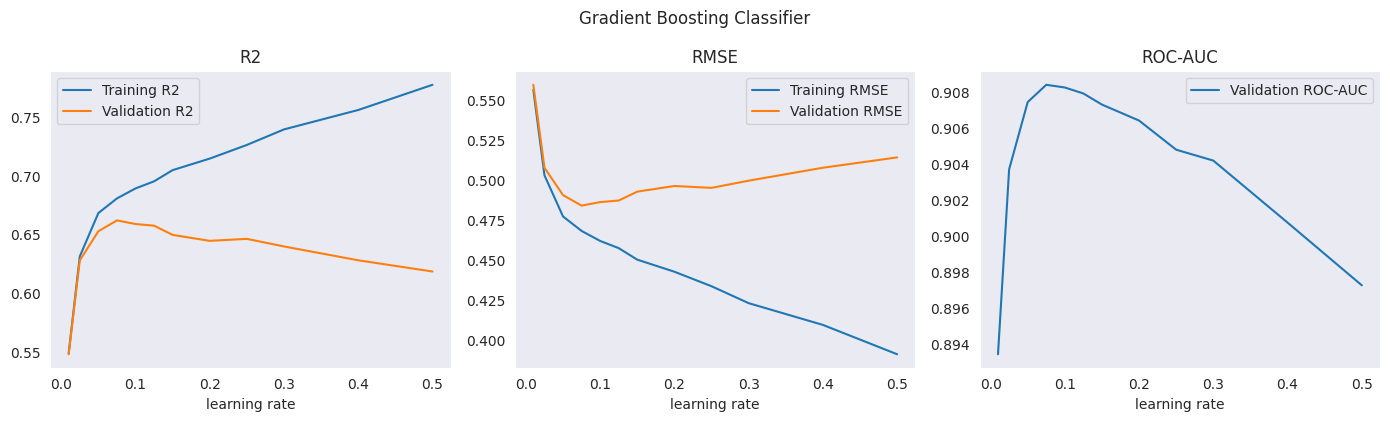

In [95]:
acc_graphs('Gradient Boosting Classifier', rates, 'learning rate', training_r2, val_r2, training_mse, val_mse, val_roc_auc, 0, 0.5, 0.1)

In [96]:
%%time

training_r2 = []
val_r2 = []
training_mse = []
val_mse = []
val_roc_auc = []
estimators = [10, 25, 50, 75, 100, 150, 200, 250]

for e in estimators:
    # Building the model.
    grad_boost = GradientBoostingClassifier(n_estimators=e, random_state=1)
    grad_boost.fit(X_train, y_train)

    # Predicting the output.
    train_pred = grad_boost.predict(X_train)
    val_pred = grad_boost.predict(X_val)

    # Recording accuracy.
    training_r2.append(r2(y_train, train_pred))
    val_r2.append(r2(y_val, val_pred))
    training_mse.append(mse(y_train, train_pred)**0.5)
    val_mse.append(mse(y_val, val_pred)**0.5)
    val_roc_auc.append(roc_auc(y_val, grad_boost.predict_proba(X_val), multi_class='ovr'))

CPU times: user 2min 22s, sys: 151 ms, total: 2min 22s
Wall time: 2min 23s


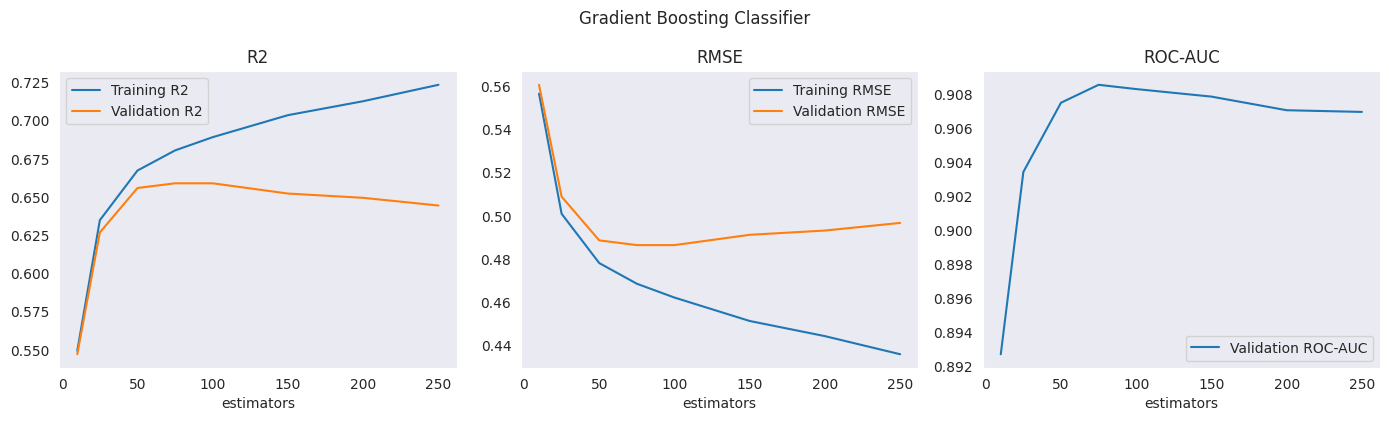

In [97]:
acc_graphs('Gradient Boosting Classifier', estimators, 'estimators', training_r2, val_r2, training_mse, val_mse, val_roc_auc, 0, 250, 50)

In [98]:
%%time

training_r2 = []
val_r2 = []
training_mse = []
val_mse = []
val_roc_auc = []
depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 18, 20, 25, 30]

for d in depth:
    # Building the model.
    grad_boost = GradientBoostingClassifier(max_depth=d, random_state=1)
    grad_boost.fit(X_train, y_train)

    train_pred = grad_boost.predict(X_train)
    val_pred = grad_boost.predict(X_val)

    # Recording accuracy.
    training_r2.append(r2(y_train, train_pred))
    val_r2.append(r2(y_val, val_pred))
    training_mse.append(mse(y_train, train_pred)**0.5)
    val_mse.append(mse(y_val, val_pred)**0.5)
    val_roc_auc.append(roc_auc(y_val, grad_boost.predict_proba(X_val), multi_class='ovr'))

CPU times: user 17min 39s, sys: 1.45 s, total: 17min 40s
Wall time: 17min 47s


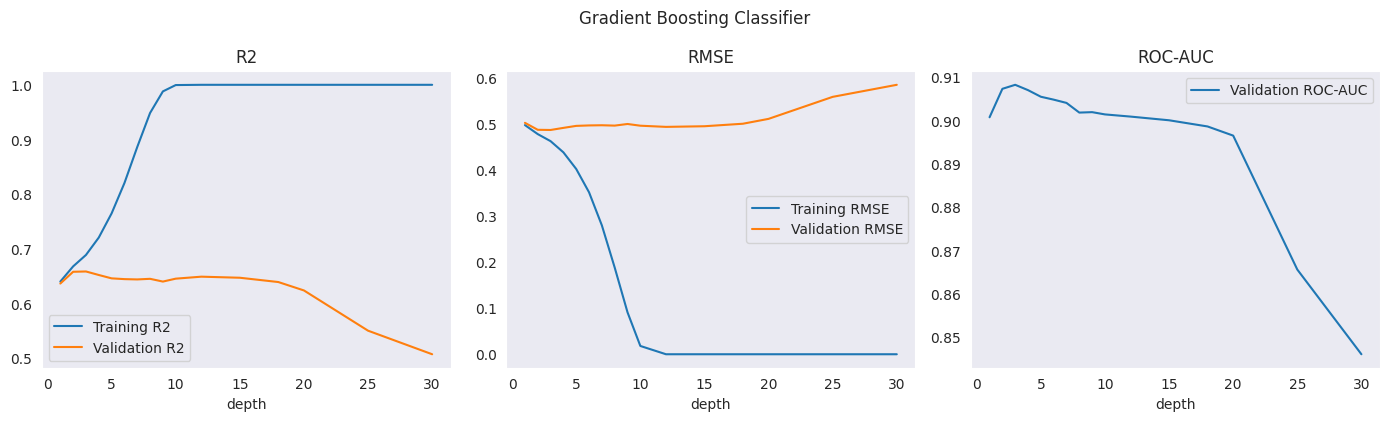

In [99]:
acc_graphs('Gradient Boosting Classifier', depth, 'depth', training_r2, val_r2, training_mse, val_mse, val_roc_auc, 0, 30, 5)

In [100]:
%%time

training_r2 = []
val_r2 = []
training_mse = []
val_mse = []
val_roc_auc = []
features = list(range(1, 22))

for f in features:
    # Building the model.
    grad_boost = GradientBoostingClassifier(max_features=f, random_state=1)
    grad_boost.fit(X_train, y_train)

    # Predicting the output.
    train_pred = grad_boost.predict(X_train)
    val_pred = grad_boost.predict(X_val)

    # Recording accuracy.
    training_r2.append(r2(y_train, train_pred))
    val_r2.append(r2(y_val, val_pred))
    training_mse.append(mse(y_train, train_pred)**0.5)
    val_mse.append(mse(y_val, val_pred)**0.5)
    val_roc_auc.append(roc_auc(y_val, grad_boost.predict_proba(X_val), multi_class='ovr'))

CPU times: user 4min 13s, sys: 281 ms, total: 4min 14s
Wall time: 4min 15s


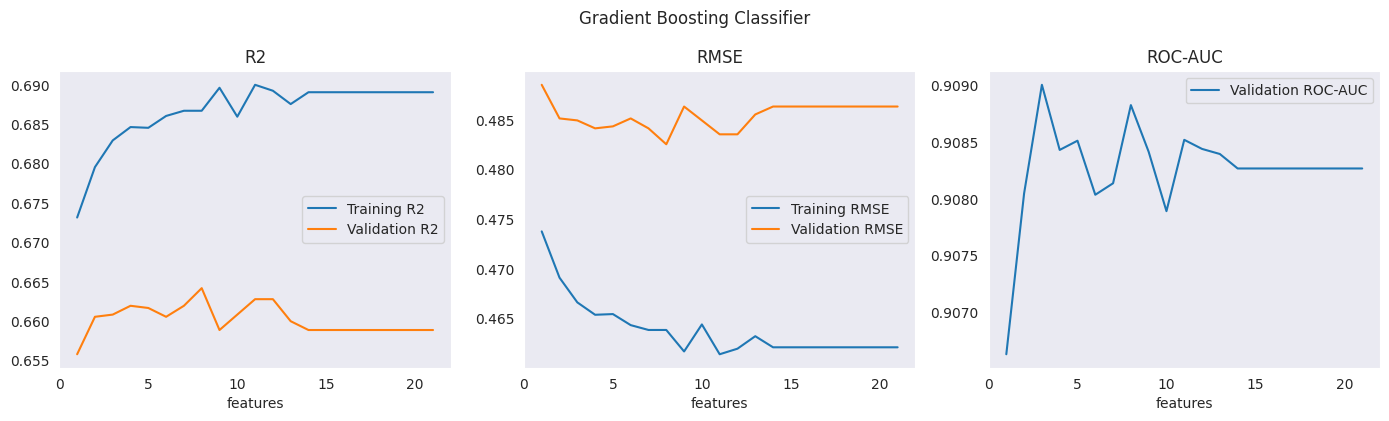

In [101]:
acc_graphs('Gradient Boosting Classifier', features, 'features', training_r2, val_r2, training_mse, val_mse, val_roc_auc, 0, 22, 5)

In [102]:
%%time

training_r2 = []
val_r2 = []
training_mse = []
val_mse = []
val_roc_auc = []
samples = list(range(2,31))

for s in samples:
    # Building the model.
    grad_boost = GradientBoostingClassifier(min_samples_split=s, random_state=1)
    grad_boost.fit(X_train, y_train)

    # Predicting the output.
    train_pred = grad_boost.predict(X_train)
    val_pred = grad_boost.predict(X_val)

    # Recording accuracy.
    training_r2.append(r2(y_train, train_pred))
    val_r2.append(r2(y_val, val_pred))
    training_mse.append(mse(y_train, train_pred)**0.5)
    val_mse.append(mse(y_val, val_pred)**0.5)
    val_roc_auc.append(roc_auc(y_val, grad_boost.predict_proba(X_val), multi_class='ovr'))

CPU times: user 8min, sys: 459 ms, total: 8min 1s
Wall time: 8min 4s


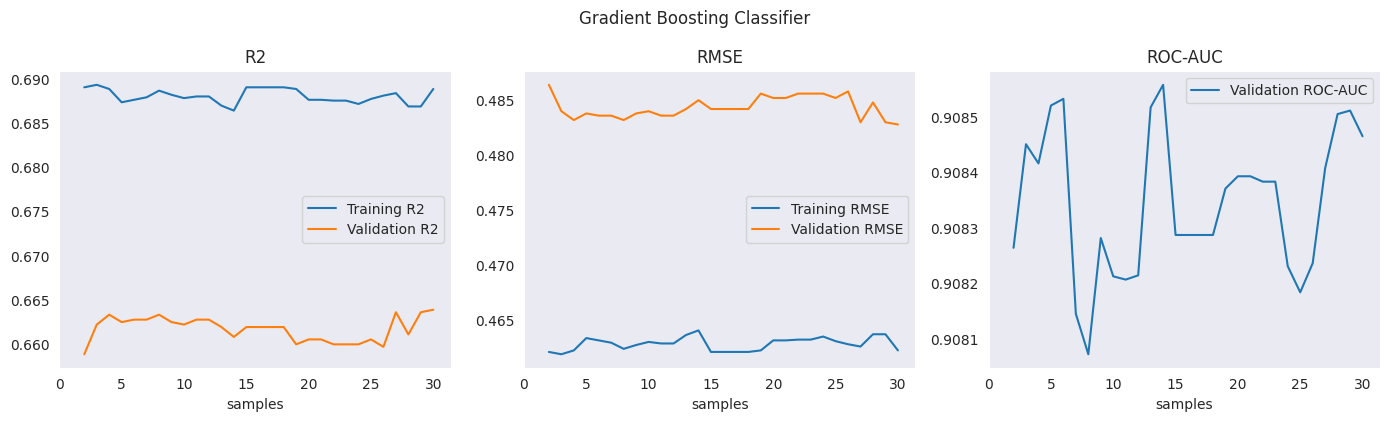

In [103]:
acc_graphs('Gradient Boosting Classifier', samples, 'samples', training_r2, val_r2, training_mse, val_mse, val_roc_auc, 0, 30, 5)

In [104]:
%%time

training_r2 = []
val_r2 = []
training_mse = []
val_mse = []
val_roc_auc = []
leaves = list(range(2,31))

for leaf in leaves:
    # Building the model.
    grad_boost = GradientBoostingClassifier(min_samples_leaf=leaf, random_state=1)
    grad_boost.fit(X_train, y_train)

    # Predicting the output.
    train_pred = grad_boost.predict(X_train)
    val_pred = grad_boost.predict(X_val)

    # Recording accuracy.
    training_r2.append(r2(y_train, train_pred))
    val_r2.append(r2(y_val, val_pred))
    training_mse.append(mse(y_train, train_pred)**0.5)
    val_mse.append(mse(y_val, val_pred)**0.5)
    val_roc_auc.append(roc_auc(y_val, grad_boost.predict_proba(X_val), multi_class='ovr'))

CPU times: user 8min 1s, sys: 459 ms, total: 8min 2s
Wall time: 8min 4s


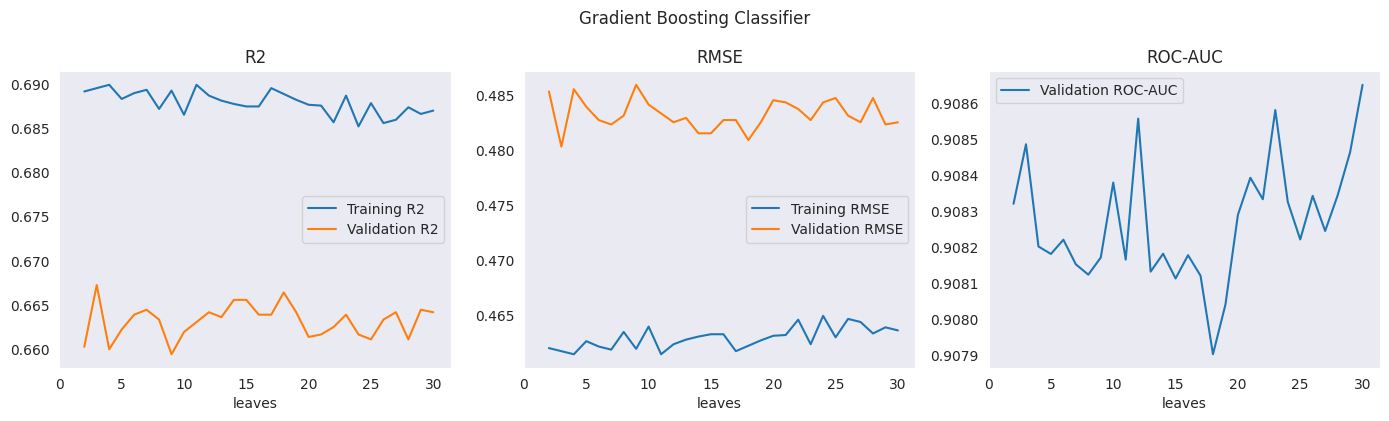

In [105]:
acc_graphs('Gradient Boosting Classifier', leaves, 'leaves', training_r2, val_r2, training_mse, val_mse, val_roc_auc, 0, 30, 5)

### Randomized Search

In [107]:
lr = [0.05, 0.075, 0.1]
n_estimators = [50, 75, 100]
max_depth = [2, 3, 4]
max_features = list(range(3, 13))
min_samples_split = list(range(2, 31))
min_samples_leaf = list(range(2, 31))

grad_boost_params = {
    'learning_rate': lr,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    }

print(grad_boost_params)

{'learning_rate': [0.05, 0.075, 0.1], 'n_estimators': [50, 75, 100], 'max_depth': [2, 3, 4], 'max_features': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [108]:
grad_boost = GradientBoostingClassifier(random_state=123)
randomized_grad_boost = RandomizedSearchCV(grad_boost, grad_boost_params, n_iter=100, cv = 5, verbose=2, n_jobs = -1)

In [109]:
%%time

randomized_grad_boost.fit(X_train, y_train)

print(randomized_grad_boost.best_params_)
print(randomized_grad_boost.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 100, 'min_samples_split': 18, 'min_samples_leaf': 13, 'max_features': 4, 'max_depth': 4, 'learning_rate': 0.075}
0.7869197665396468
CPU times: user 24.9 s, sys: 2.96 s, total: 27.8 s
Wall time: 39min 47s


In [110]:
print(randomized_grad_boost.best_params_)
print(randomized_grad_boost.best_score_)

{'n_estimators': 100, 'min_samples_split': 18, 'min_samples_leaf': 13, 'max_features': 4, 'max_depth': 4, 'learning_rate': 0.075}
0.7869197665396468


### Final Model

In [111]:
%%time

best_grad_boost = GradientBoostingClassifier(learning_rate=0.075, n_estimators=100, max_depth=4, max_features=4, \
                                             min_samples_split=18, min_samples_leaf=13, random_state=123)
best_grad_boost.fit(X_train, y_train)
print(best_grad_boost)

GradientBoostingClassifier(learning_rate=0.075, max_depth=4, max_features=4,
                           min_samples_leaf=13, min_samples_split=18,
                           random_state=123)
CPU times: user 8.24 s, sys: 16.8 ms, total: 8.26 s
Wall time: 9.09 s


In [112]:
print(classification_report(y_val, best_grad_boost.predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      2639
         1.0       0.62      0.48      0.54      1229
         2.0       0.89      0.84      0.87      1290

    accuracy                           0.80      5158
   macro avg       0.77      0.75      0.76      5158
weighted avg       0.79      0.80      0.79      5158



In [113]:
print('Best Decision Tree Classifier Results:')
class_acc(best_grad_boost, X_train, y_train, X_val, y_val)

Best Decision Tree Classifier Results:
Training Score: 0.818
Validation Score: 0.795
Validation ROC-AUC Score: 0.909
---
Training R2: 0.697
Validation R2: 0.662
---
Training RMSE: 0.456
Validation RMSE: 0.484


In [114]:
print('Gradient Booster Tuning Improvement:')
class_acc_improvement(base_grad_boost, best_grad_boost, X_train, y_train, X_val, y_val)

Gradient Booster Tuning Improvement:
Training Score Change: 0.006
Validation Score Change: -0.001
Validation ROC-AUC Score Change: 0.001
---
Training R2 Change: 0.008
Validation R2 Change: 0.003
---
Training RMSE Change: -0.006
Validation RMSE Change: -0.002


# Conclusion

Changes to Gradient Boosting Classifier through hyperparameter tuning has been negligible. It appears that searching for a more optimal result would require more time and computing power than what it's worth. The ROC-AUC score seems to max out at about 0.908-0.910 with the Validation Score maxing out just under 0.800. This result isn't great but it is certainly an improvement on what we had before.

The next step will be to explore this dataset through neural networks.